<a href="https://colab.research.google.com/github/sammyfow/cap-comp215/blob/2024.01/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1
Name: Sam Fowler

Start Date: 02/05/2024

End Date:

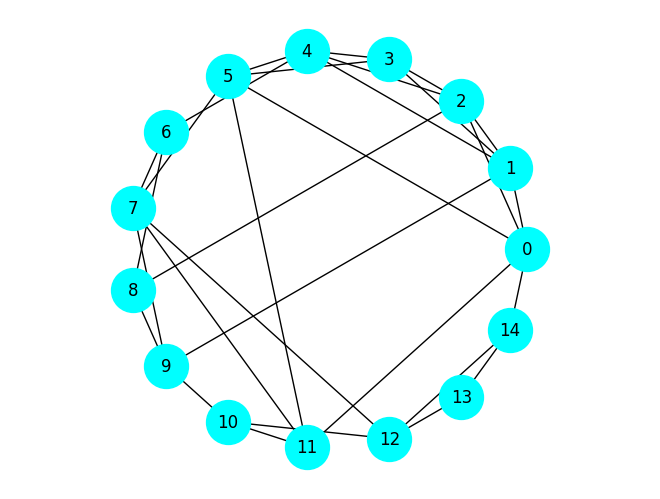

{0, 2, 3, 4, 9}


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

example = np.logspace(1, 10, 10)
#nodes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


def better_pairs(objects):
  for i in range(len(objects)):
    for j in range(i+1, len(objects)):
      yield(objects[i], objects[j])


def make_complete_graph(n):
  points = range(n)
  graph = nx.Graph()
  graph.add_nodes_from(points)
  graph.add_edges_from(better_pairs(points))
  return graph


def reachable_nodes(graph, start):
  seen = set()
  stack = [start]
  while stack:
      node = stack.pop()
      seen.add(node)
      neighbors = graph.neighbors(node)
      for n in neighbors:
        if n not in seen:
          seen.add(n)
          stack.append(n)
  return seen


def is_complete(g):
  start = next(iter(g))
  reachable = reachable_nodes(g, start)
  return len(g) == len(reachable)


def adjecent_edges(n, k):
  nodes = range(n)
  for i in nodes:
    for j in range(k // 2):
      yield i, (i + j + 1) % n


def make_ring_lattice(n, k):
  g = nx.Graph()
  nodes = range(n)
  g.add_nodes_from(nodes)
  g.add_edges_from(adjecent_edges(n, k))
  return g


def rewire(g, p):
  nodes = set(g)
  for a, b in g.edges():
    if np.random.random() < p:
      choices = nodes - {a} - set(g[a])
      new_b = np.random.choice(list(choices))
      g.remove_edge(a, b)
      g.add_edge(a, new_b)
  return g


lattice = rewire(make_ring_lattice(15, 4), 0.3)
nx.draw_circular(lattice,
                 node_color='cyan',
                 node_size=1000,
                 with_labels=True)
plt.axis('equal')
plt.show()


print(set(lattice[1]))
